In [26]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [27]:
df = pd.read_csv(r"C:\Users\apurv\Desktop\NTU_YEAR_4\CZ4032\Project\Breast Cancer Prediction.csv")
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,B
1,1002945,5,4,4,5,7,10,3,2,1,B
2,1015425,3,1,1,1,2,2,3,1,1,B
3,1016277,6,8,8,1,3,4,3,7,1,B
4,1017023,4,1,1,3,2,1,3,1,1,B


In [28]:
# find identical data
duplicate_bool = df.duplicated(keep='first')
duplicate = df.loc[duplicate_bool == True]

df = df[~df.isin(duplicate)].dropna()
df.shape

(675, 11)

<AxesSubplot:>

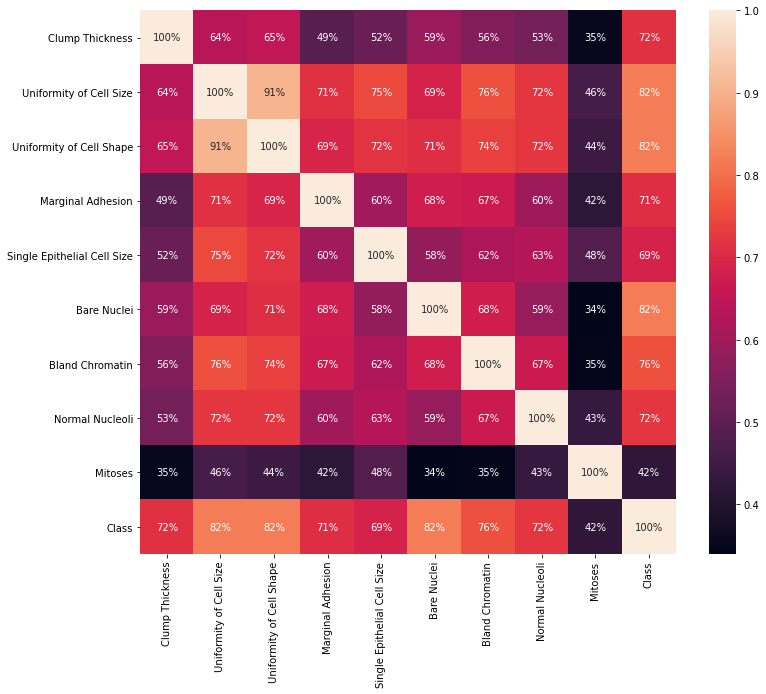

In [29]:
#drop sample code column
del df["Sample code number"]

df['Class'].replace({'B': 0, 'M': 1}, inplace=True)
#lets find correlation
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(),ax=ax, annot=True, fmt='.0%')

In [30]:
#no of rows and columns
df.shape

(675, 10)

In [31]:
#lets check data types
df.dtypes

Clump Thickness                float64
Uniformity of Cell Size        float64
Uniformity of Cell Shape       float64
Marginal Adhesion              float64
Single Epithelial Cell Size    float64
Bare Nuclei                    float64
Bland Chromatin                float64
Normal Nucleoli                float64
Mitoses                        float64
Class                            int64
dtype: object

In [32]:
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000
mean,4.451852,3.146667,3.208889,2.848889,3.229630,3.537778,3.442963,2.885926,1.607407,0.349630
std,2.820859,3.055005,2.976552,2.875917,2.208497,3.637871,2.453894,3.065607,1.741006,0.477207
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [33]:
df.isnull().values.any()

False

In [34]:
df.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [35]:
#lets count class labels
df['Class'].value_counts()

0    439
1    236
Name: Class, dtype: int64

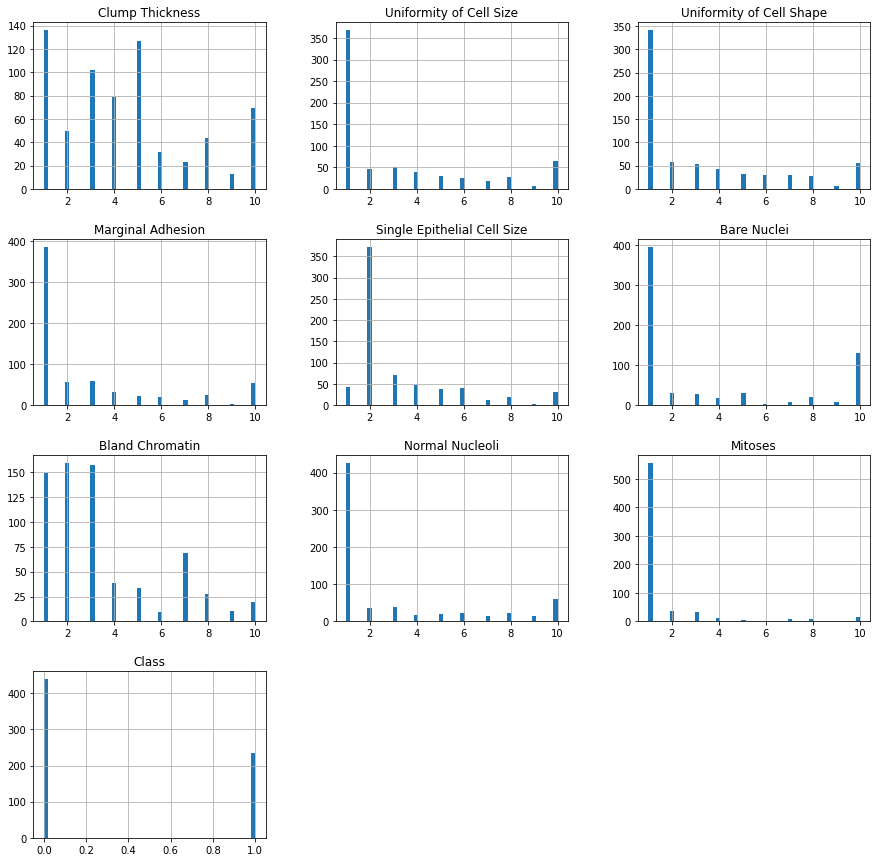

In [36]:
#Data visualization
#histogram
df.hist(bins=50,figsize=(15,15))
plt.show()

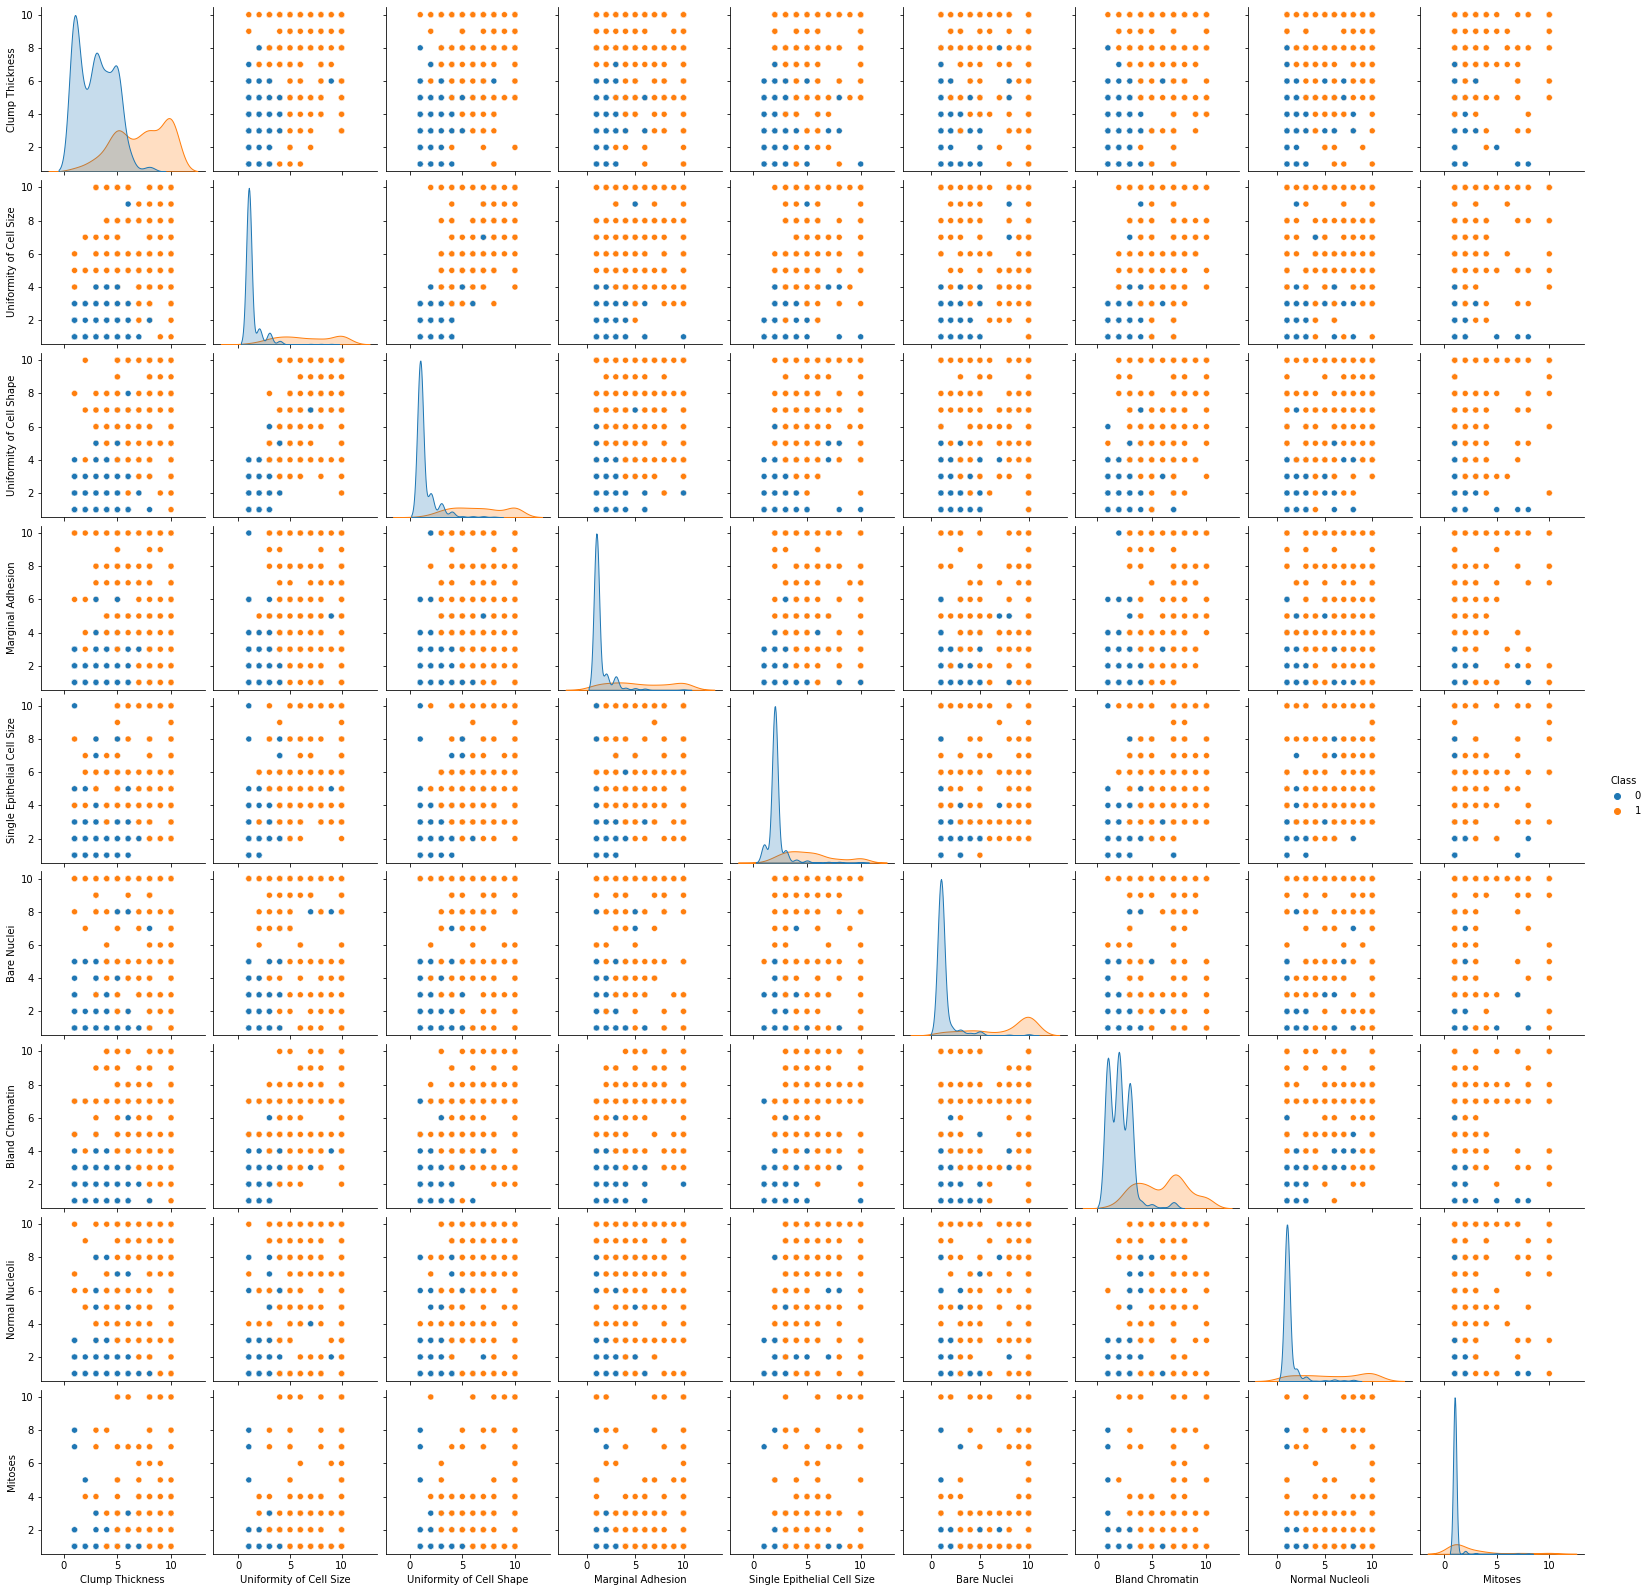

In [37]:
#Scatter matrix to check correlation between two attributes

sns.pairplot(df,hue='Class')

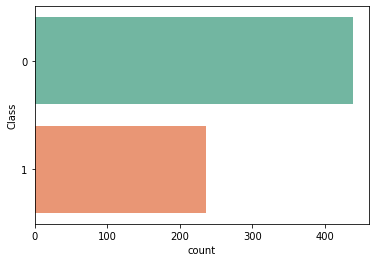

In [38]:
#Count each label 
ax=sns.countplot(y='Class',data=df,palette='Set2')

In [39]:
#Get the correlation of the columns
df.corr()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.640847,0.652617,0.489421,0.519172,0.593936,0.556404,0.533891,0.351270,0.715714
Uniformity of Cell Size,0.640847,1.000000,0.905755,0.714650,0.748829,0.689895,0.759418,0.723712,0.462185,0.820663
Uniformity of Cell Shape,0.652617,0.905755,1.000000,0.694029,0.717186,0.710876,0.737873,0.723241,0.443013,0.820688
Marginal Adhesion,0.489421,0.714650,0.694029,1.000000,0.603479,0.676428,0.671744,0.602188,0.418393,0.710985
Single Epithelial Cell Size,0.519172,0.748829,0.717186,0.603479,1.000000,0.582752,0.622649,0.634129,0.484212,0.689544
Bare Nuclei,0.593936,0.689895,0.710876,0.676428,0.582752,1.000000,0.679137,0.587950,0.339792,0.820533
Bland Chromatin,0.556404,0.759418,0.737873,0.671744,0.622649,0.679137,1.000000,0.668820,0.345681,0.758252
Normal Nucleoli,0.533891,0.723712,0.723241,0.602188,0.634129,0.587950,0.668820,1.000000,0.433039,0.722020
Mitoses,0.351270,0.462185,0.443013,0.418393,0.484212,0.339792,0.345681,0.433039,1.000000,0.424399
Class,0.715714,0.820663,0.820688,0.710985,0.689544,0.820533,0.758252,0.722020,0.424399,1.000000


<AxesSubplot:>

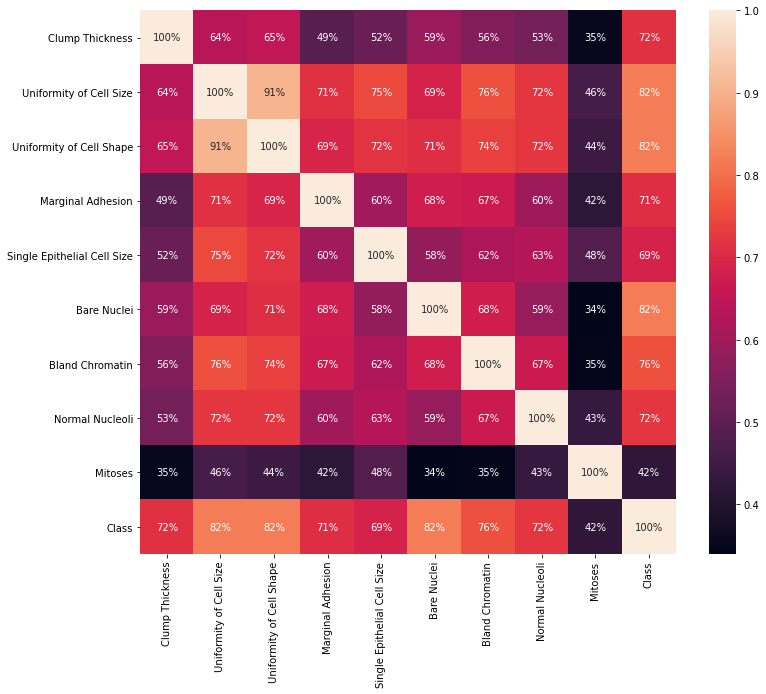

In [40]:
#lets find correlation
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(),ax=ax, annot=True, fmt='.0%')

(675, 10)

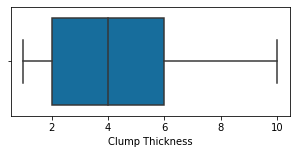

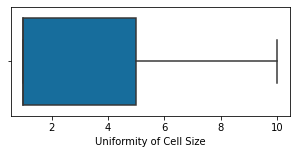

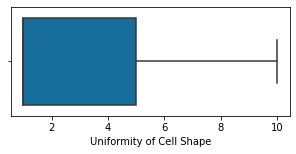

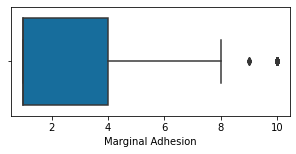

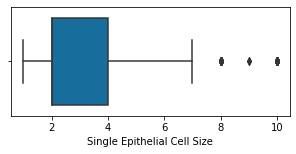

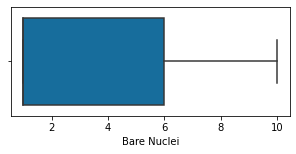

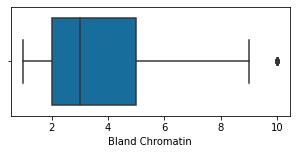

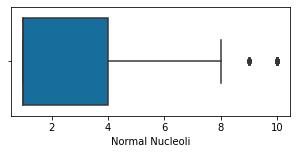

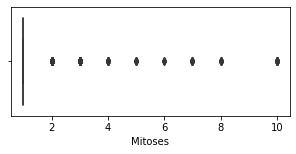

In [41]:
#box plot to check outlier in each category

#define function can be call later 
def boxPlot(dff):
    d=dff.drop(columns=['Class'])
    for column in d:
        plt.figure(figsize=(5,2))
        sns.boxplot(x=column,data=d,palette="colorblind")
boxPlot(df)
df.shape

In [42]:
#Quartile range

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

##---quartiles and IQR

print("Quartile 1:\n\n",Q1)
print("\n\nQuartile 3:\n\n",Q3)
print("\n\nIQR:\n\n",IQR)

#--display outlier
#to be continued...see if removing outliers help
print((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR)))
df.shape

Quartile 1:

 Clump Thickness                2.0
Uniformity of Cell Size        1.0
Uniformity of Cell Shape       1.0
Marginal Adhesion              1.0
Single Epithelial Cell Size    2.0
Bare Nuclei                    1.0
Bland Chromatin                2.0
Normal Nucleoli                1.0
Mitoses                        1.0
Class                          0.0
Name: 0.25, dtype: float64


Quartile 3:

 Clump Thickness                6.0
Uniformity of Cell Size        5.0
Uniformity of Cell Shape       5.0
Marginal Adhesion              4.0
Single Epithelial Cell Size    4.0
Bare Nuclei                    6.0
Bland Chromatin                5.0
Normal Nucleoli                4.0
Mitoses                        1.0
Class                          1.0
Name: 0.75, dtype: float64


IQR:

 Clump Thickness                4.0
Uniformity of Cell Size        4.0
Uniformity of Cell Shape       4.0
Marginal Adhesion              3.0
Single Epithelial Cell Size    2.0
Bare Nuclei                    5

(675, 10)